In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

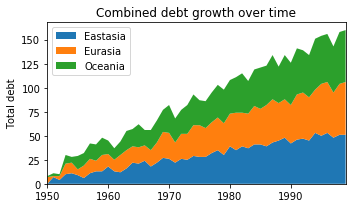

In [26]:
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

fig, ax = plt.subplots(figsize=(5, 3))
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()

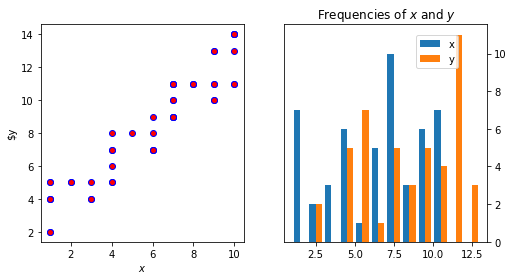

In [27]:
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5,  size=x.size)
data = np.column_stack((x,y))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y')

ax2.hist(data, bins=np.arange(data.min(), data.max()), label=('x','y'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

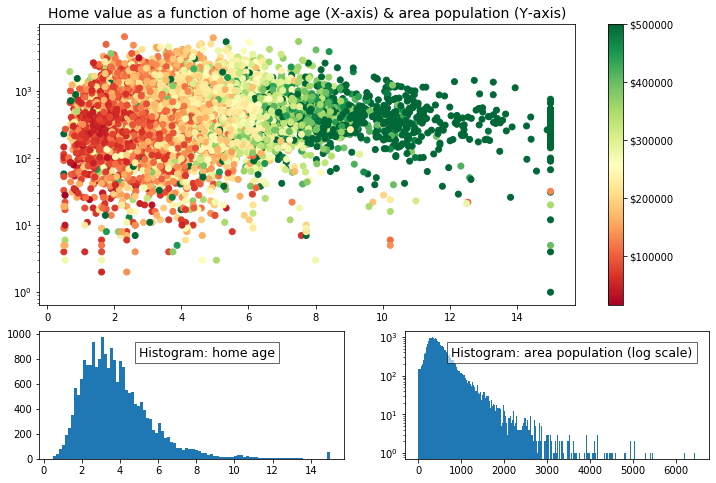

In [16]:
from io import BytesIO
import tarfile
from urllib.request import urlopen

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')
    
    
y = housing[:, -1]
pop, age = housing[:, [4, 7]].T

def add_titlebox(ax, text):
    ax.text(.55, .8, text,
           horizontalalignment='center',
           transform=ax.transAxes,
           bbox=dict(facecolor='white', alpha=0.6),
           fontsize=12.5)
    return ax

gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0,0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2,0))
ax3 = plt.subplot2grid(gridsize, (2,1))

ax1.set_title('Home value as a function of home age (X-axis) & area population (Y-axis)', fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scale)')

In [18]:
plt.close('all')

{'left': False, 'right': False, 'top': False, 'bottom': False, 'labelleft': False, 'labelright': False, 'labeltop': False, 'labelbottom': False}


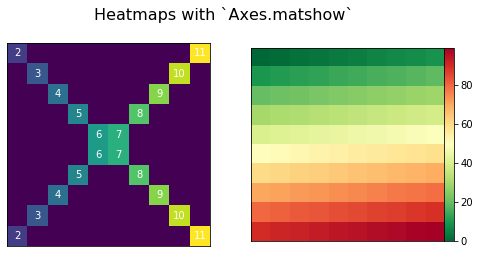

In [22]:
x = np.diag(np.arange(2, 12))[::-1]
x[np.diag_indices_from(x[::-1])] = np.arange(2,12)
x2 = np.arange(x.size).reshape(x.shape)

sides = ('left', 'right', 'top', 'bottom')
nolabels = {s: False for s in sides}
nolabels.update({'label%s' %s: False for s in sides})
print(nolabels)

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

with plt.rc_context(rc={'axes.grid': False}):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    ax1.matshow(x)
    img2 = ax2.matshow(x2, cmap='RdYlGn_r')
    for ax in (ax1, ax2):
        ax.tick_params(axis='both', which='both', **nolabels)
    for i, j in zip(*x.nonzero()):
        ax1.text(j, i, x[i, j], color='white', ha='center', va='center')
    
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0)
    plt.colorbar(img2, cax=cax, ax=[ax1, ax2])
    fig.suptitle('Heatmaps with `Axes.matshow`', fontsize=16)